# Customer Churn Perdiction_Data Science Practice
## 資料來源:https://www.kaggle.com/datasets/blastchar/telco-customer-churn/versions/1?resource=download

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df=pd.read_csv('C:/Users/jason/Python-learning/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 資料檢視

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df['TotalCharges']=df['TotalCharges'].astype(float) #代表TotalCharges有空白字串

ValueError: could not convert string to float: ''

In [32]:
print("Rows : " , df.shape[0])
print("Columns: " , df.shape[1] )
print('Missing Value number : ' , df.isnull().sum().values.sum()) 
print('\nUnique values\n',df.nunique())

Rows :  7043
Columns:  21
Missing Value number :  11

Unique values
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


### 可以挑tenure、MonthlyCharges跟TotalCharges來看

In [38]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

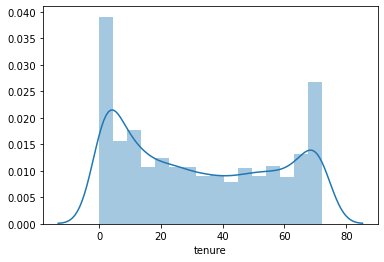

In [21]:
sns.distplot(df.tenure)

In [39]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

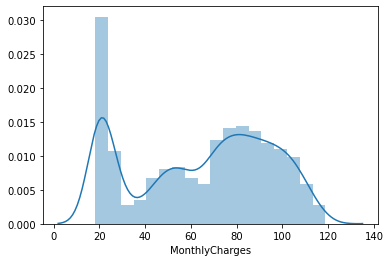

In [20]:
sns.distplot(df.MonthlyCharges)

In [40]:
df.TotalCharges.describe() #該轉數值型

count     7032
unique    6530
top       20.2
freq        11
Name: TotalCharges, dtype: object

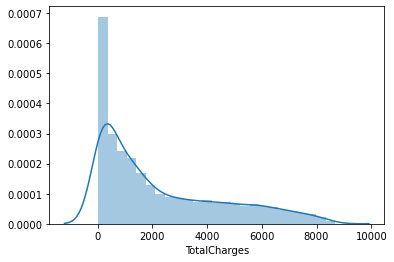

In [43]:
sns.distplot(df.TotalCharges)

In [4]:
# 空白值當null
df['TotalCharges'] = df.TotalCharges.replace(' ' , np.nan)
print(df.TotalCharges.isnull().sum())

11


In [5]:
df[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


C:\Users\jason\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


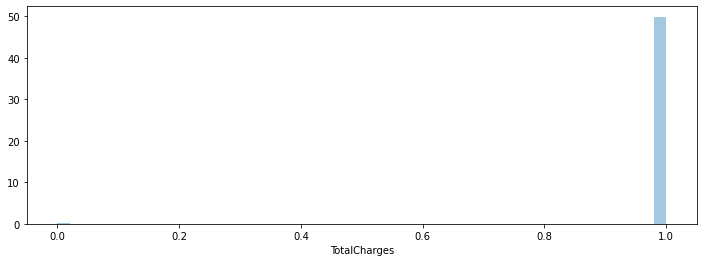

In [7]:
plt.figure(figsize = (12,4))
sns.distplot(df.TotalCharges.notnull().astype(float))

In [44]:
#因缺失資料量不大，清除有缺失值的資料
df_clean = df.dropna(subset=['TotalCharges'])
df_clean = df_clean.reset_index()[df.columns]

In [46]:
df_clean['TotalCharges']=df['TotalCharges'].astype(float) 

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


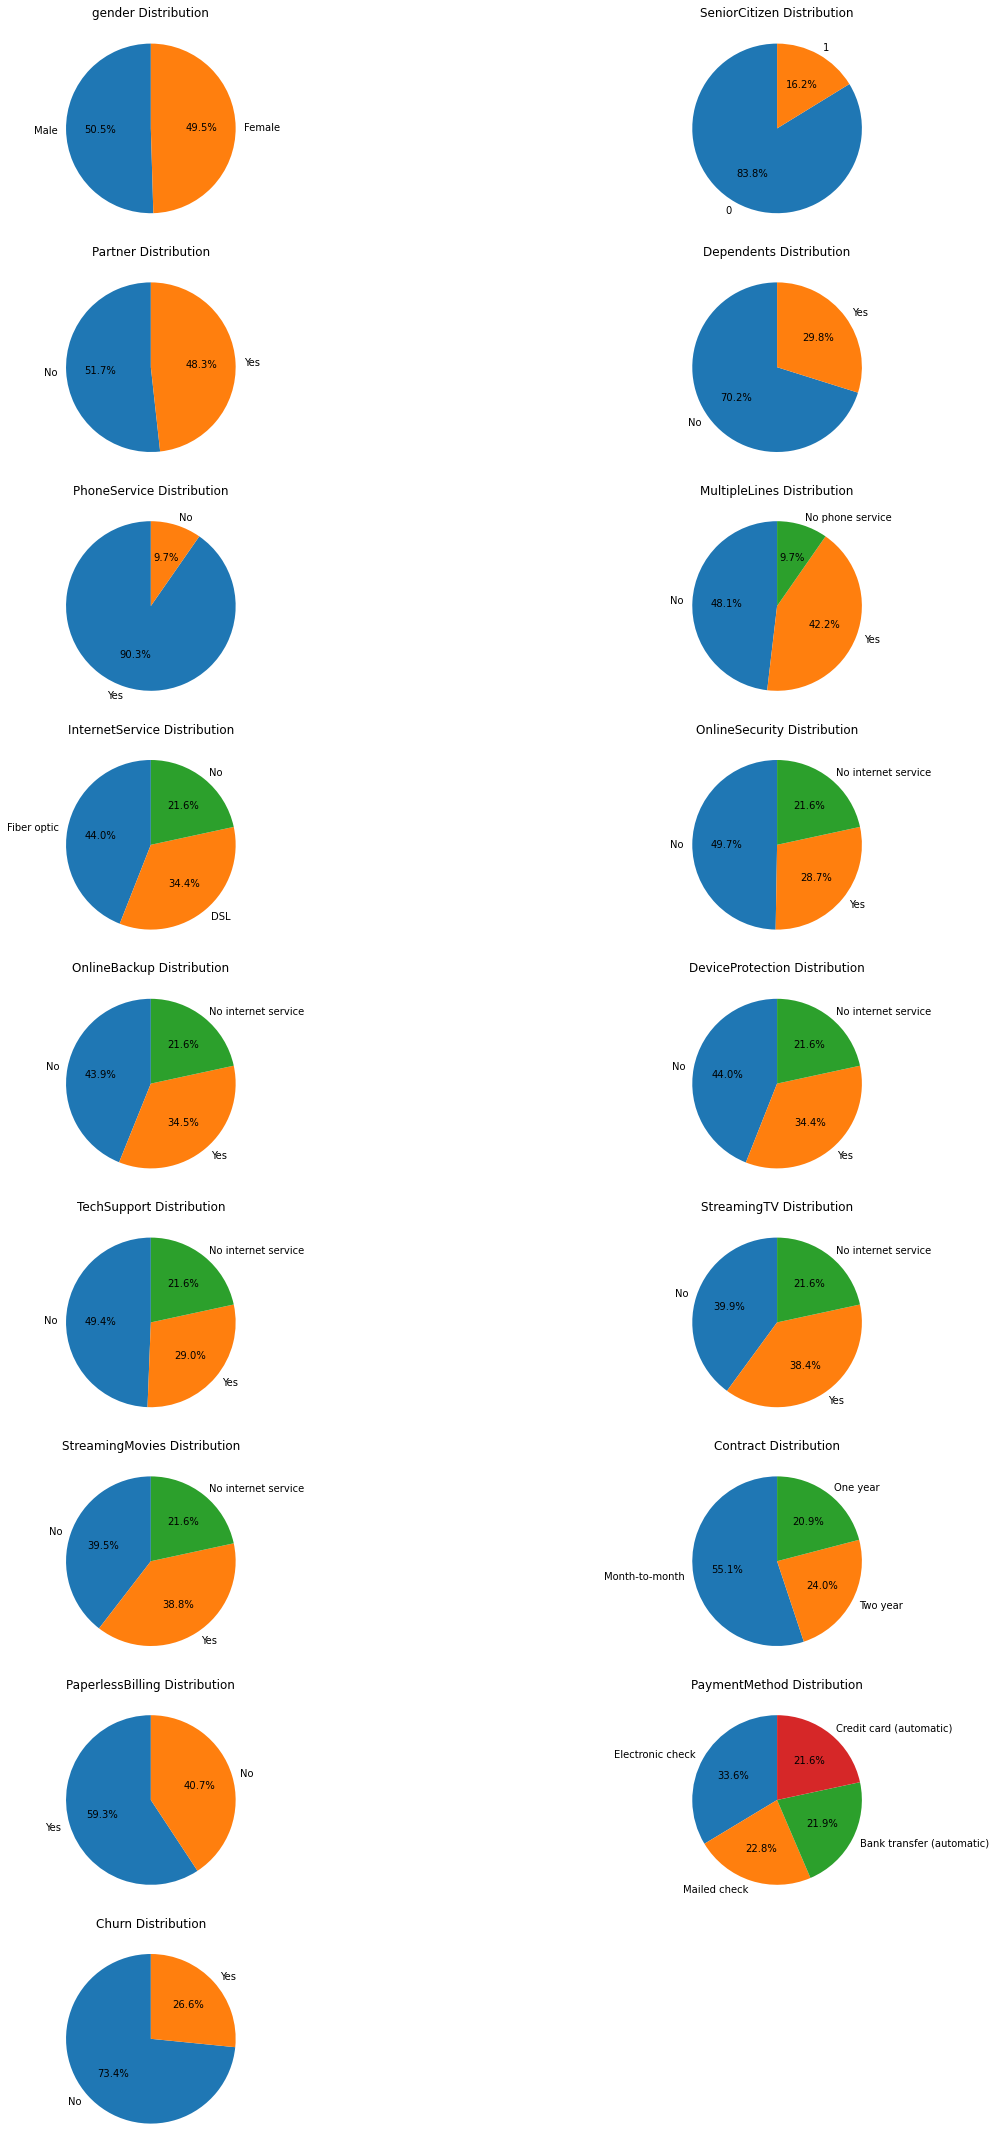

In [9]:
#pie
fig = plt.figure(figsize=(20, 30), facecolor='white')

categorical_col = ['gender', 'SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
unique_categories_dataframes = {}

ncols = 2
nrows = (len(categorical_col) + ncols - 1) // ncols

# subplot建立
axes = fig.subplots(nrows=nrows, ncols=ncols)

for idx, column in enumerate(categorical_col):
    row, col = idx // ncols, idx % ncols
    value_counts = df_clean[column].value_counts(normalize=True)
    labels = value_counts.index
    sizes = value_counts.values
    axes[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[row, col].set_title(f'{column} Distribution')

# 移除空的subplot 
if nrows * ncols > len(categorical_col):
    for idx in range(len(categorical_col), nrows * ncols):
        row, col = idx // ncols, idx % ncols
        fig.delaxes(axes[row, col]) 

plt.tight_layout()
plt.show()

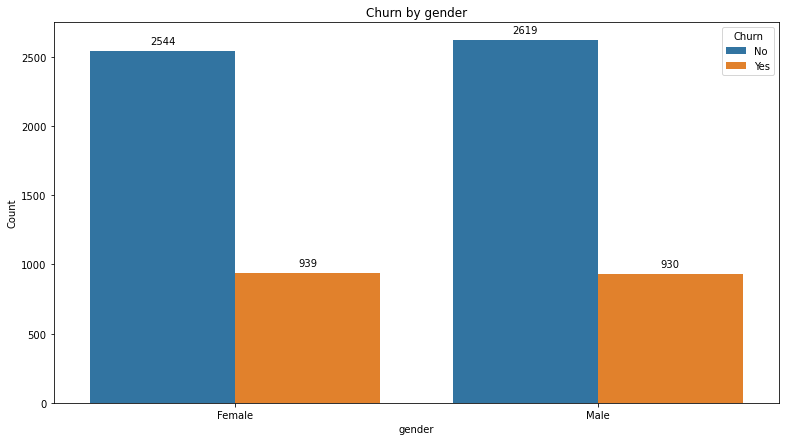

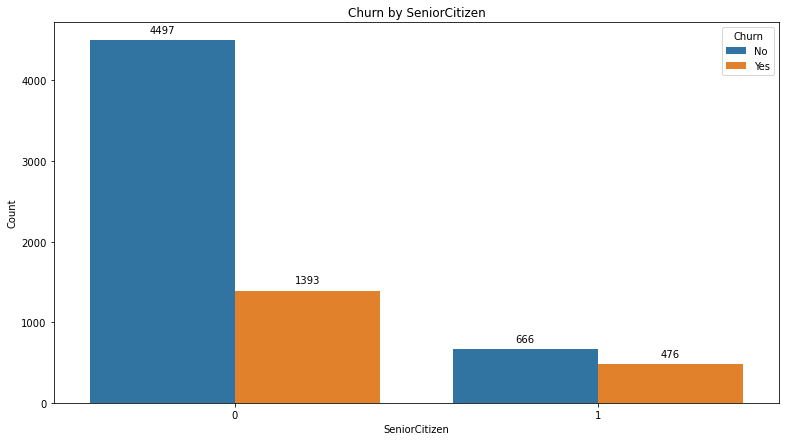

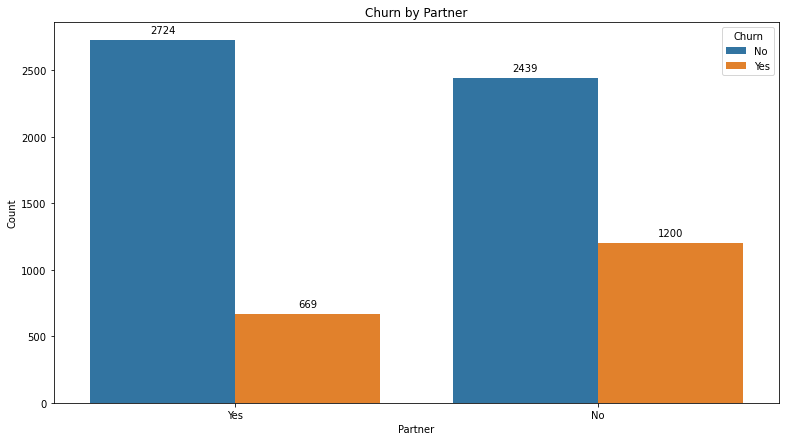

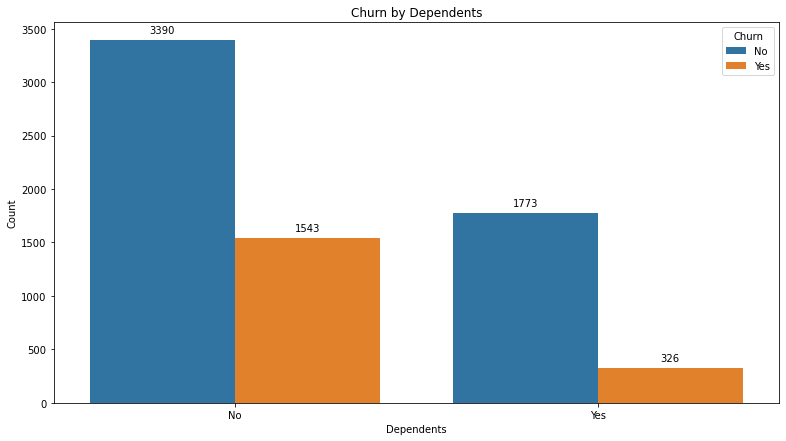

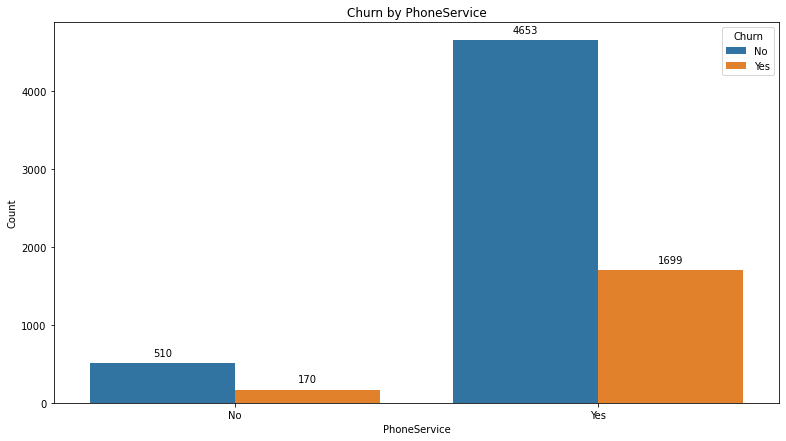

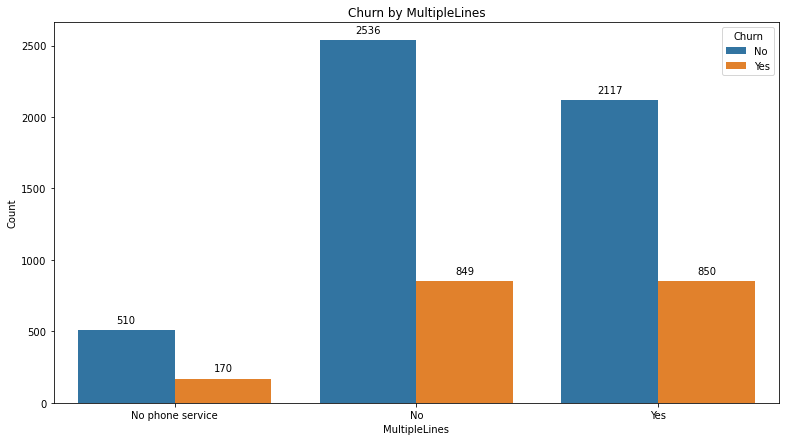

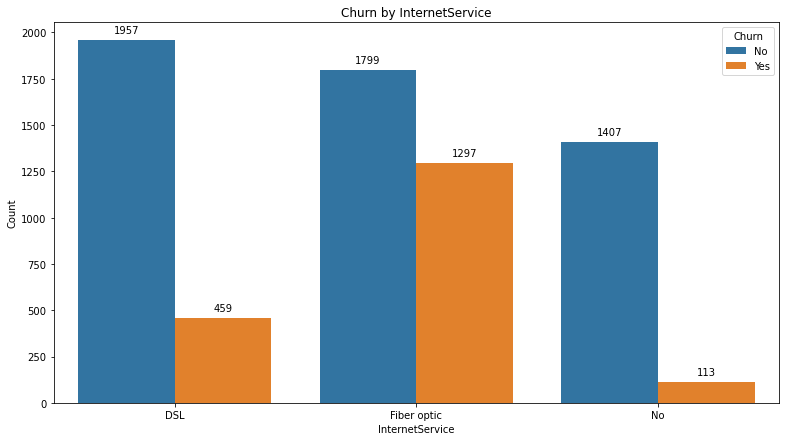

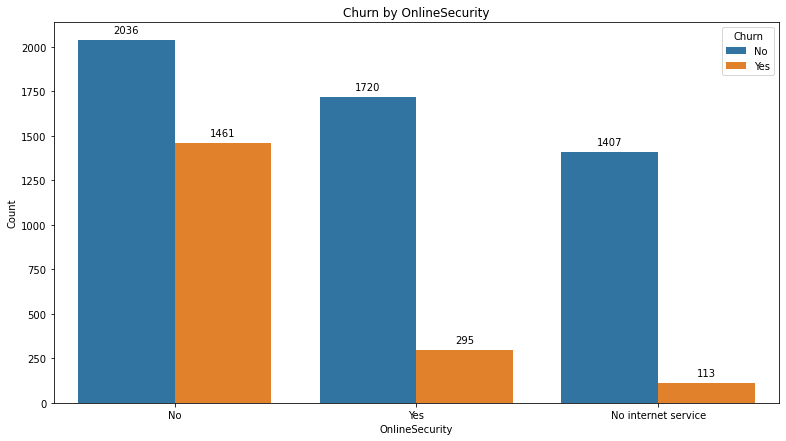

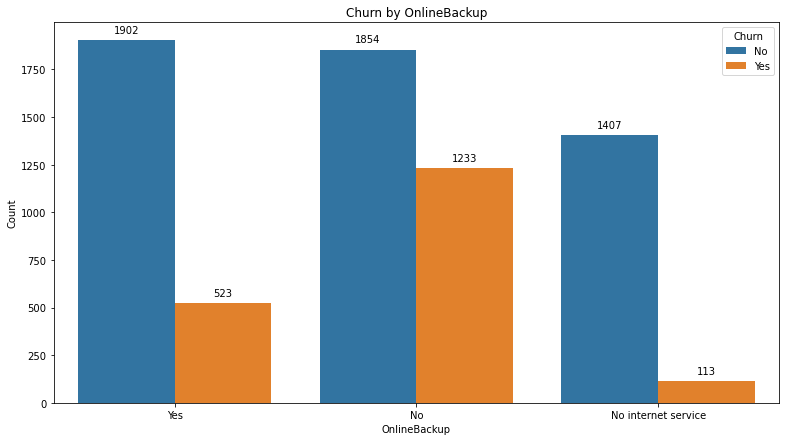

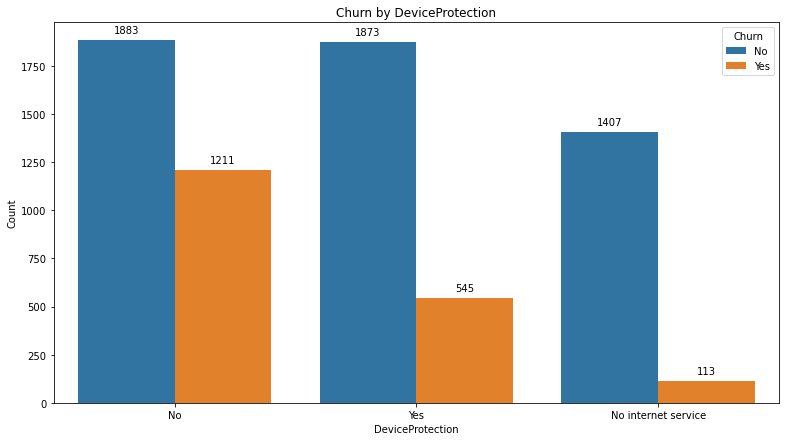

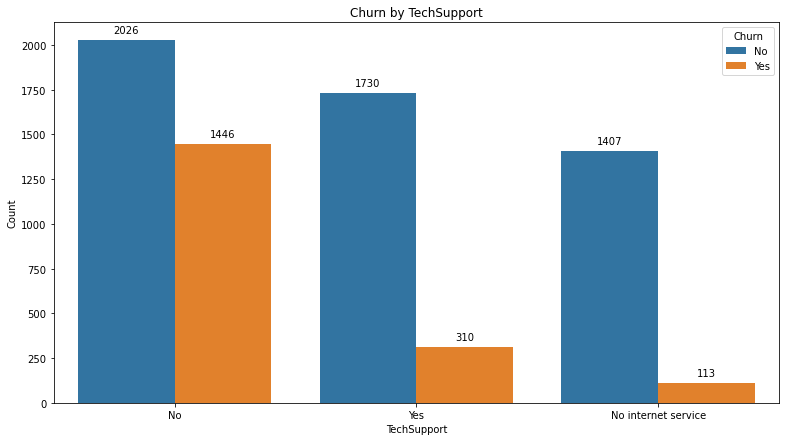

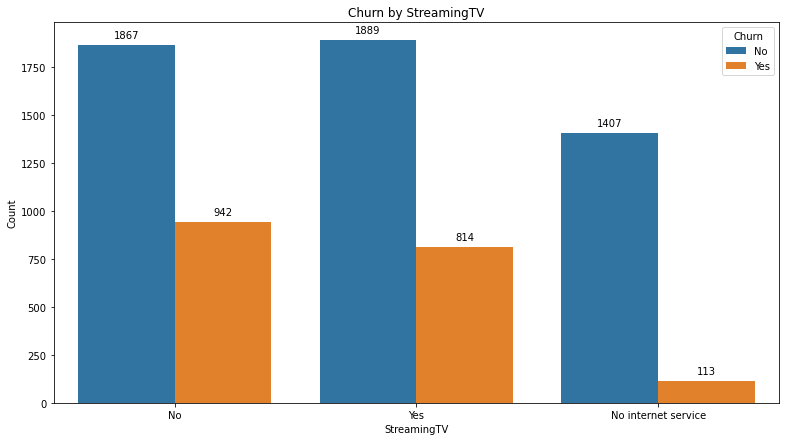

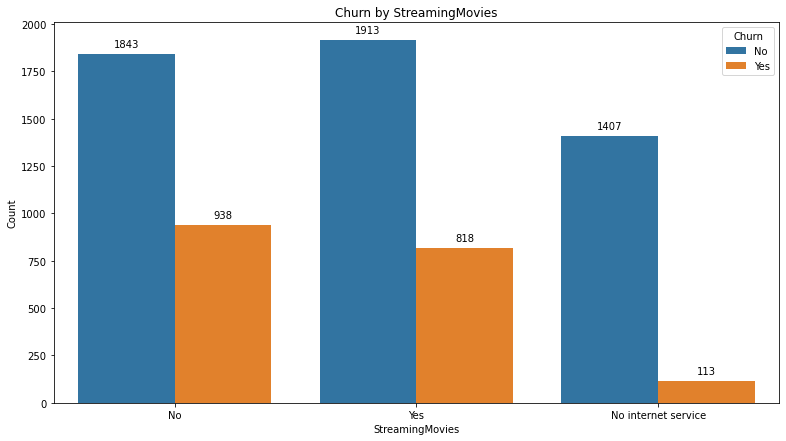

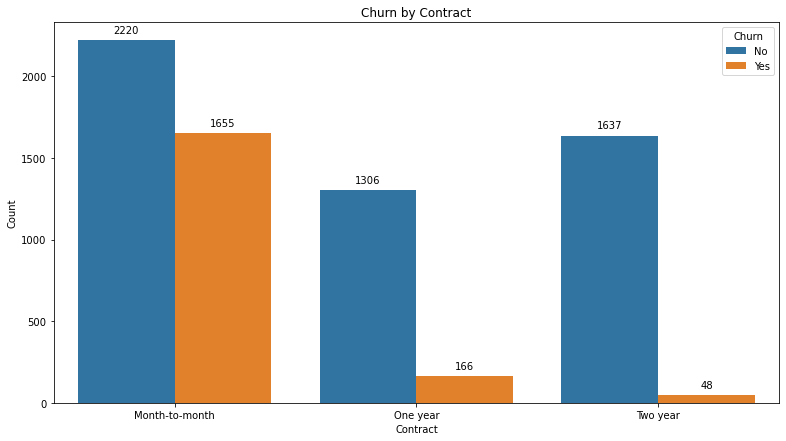

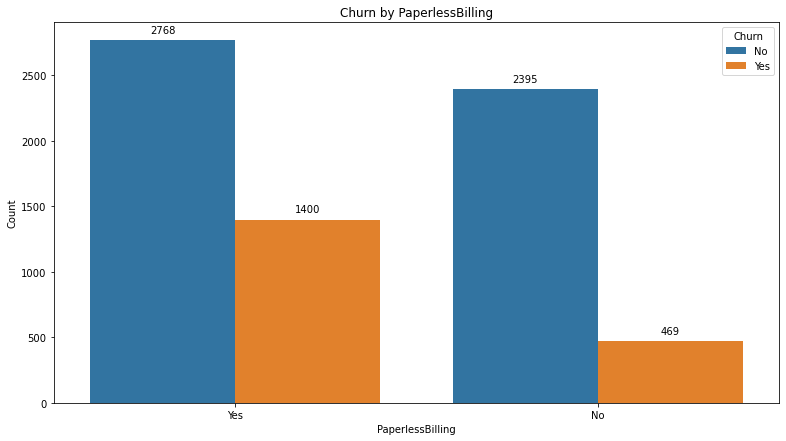

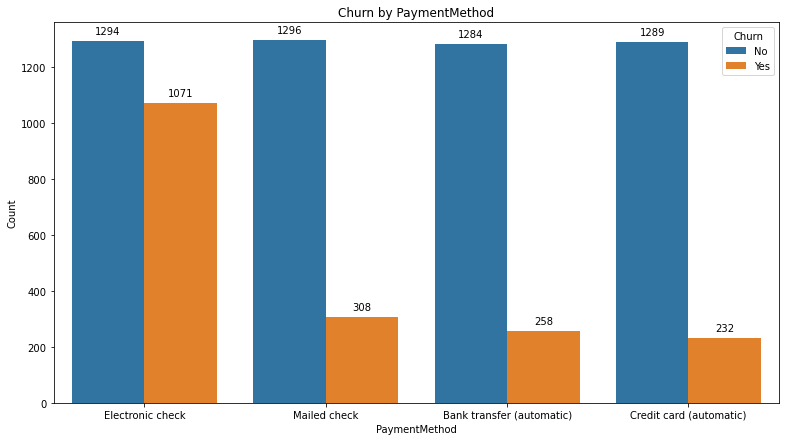

In [10]:
#針對客戶是否流失對每個欄位作統計長條圖
categorical_col_churn = ['gender', 'SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for col in categorical_col_churn:
    plt.figure(figsize=(13, 7))
    ax = sns.countplot(x=col, hue='Churn', data=df_clean)
    plt.title(f"Churn by {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

    # 在bar圖上加入數值
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    plt.show()

主要客群不是年長者，且年長者流失率較非年長者高，可能是因為他們不常使用這些功能。

沒有對象或家屬陪伴的客戶流失人數較多。

有使用網路的客戶較容易流失(特別是Fiber optc的客群)，推測是能用網路去看其他提供類似服務的公司，導致有些流失客群被吸引走。

沒有使用Online Security、Online Backup、Device Proctection、Tech Support的客戶較容易流失。

使用Electronic check(電子支票)的流失人數相對其他支付方式多。

大部分的流失客群都是月繳的，綁1~2年合約的流失率較低，推測月繳的流失客群較容易被其他公司的方案或服務吸引。

性別、Multiple Lines(Yes/No)、Streaming TV/Movies(Yes/No)與流失率的關係不大。

## 對YES/NO資料Label encoding並對多類別資料進行One hot encoding

In [28]:
df_clean_2 = df_clean.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()
binary_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_col:
    df_clean_2[col] = encoder.fit_transform(df_clean_2[col])

In [30]:
multi_col = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod']
df_clean_2 = pd.get_dummies(df_clean_2, columns=multi_col, drop_first=True)

In [61]:
df_clean_2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,84.80,931.55,...,1,0,1,0,1,1,0,0,0,1
7028,2234-XADUH,0,0,1,1,72,1,1,103.20,4326.25,...,0,0,1,0,1,1,0,1,0,0
7029,4801-JZAZL,0,0,1,1,11,0,1,29.60,263.05,...,0,0,0,0,0,0,0,0,1,0
7030,8361-LTMKD,1,1,1,0,4,1,1,74.40,39.25,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int32  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int32  
 4   Dependents                             7032 non-null   int32  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int32  
 7   PaperlessBilling                       7032 non-null   int32  
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7021 non-null   float64
 10  Churn                                  7032 non-null   int32  
 11  Mult

In [62]:
df_clean_3=df_clean_2.drop('customerID',axis=1)

## 透過相關係數查看關聯性

In [34]:
df_clean_3_corr=df_clean_3.corr()
df_clean_3_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.011902,-0.013779,0.007336,-0.008545,...,-0.008507,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,0.001632,0.000844,0.013199
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.003646,0.150541,...,-0.060577,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,-0.024359,0.171322,-0.152987
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.044639,-0.149982,...,0.120206,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,0.082327,-0.083207,-0.096948
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.044390,-0.163128,...,0.063053,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,0.061134,-0.149274,0.056448
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.076349,-0.354049,...,0.325288,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.232800,-0.210197,-0.232181
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.011081,0.011691,...,-0.095138,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,-0.006916,0.002747,-0.004463
PaperlessBilling,-0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.005739,0.191454,...,0.037536,-0.320592,0.224241,-0.320592,0.211583,-0.052278,-0.146281,-0.013726,0.208427,-0.203981
MonthlyCharges,-0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.035798,0.192858,...,0.338301,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.030055,0.271117,-0.376568
TotalCharges,0.007336,0.003646,0.044639,0.044390,0.076349,0.011081,0.005739,0.035798,1.000000,-0.039551,...,0.042939,-0.008789,0.032623,-0.008789,0.030688,0.013153,0.043239,0.010118,-0.029008,-0.002905
Churn,-0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.039551,1.000000,...,-0.164716,-0.227578,0.063254,-0.227578,0.060860,-0.178225,-0.301552,-0.134687,0.301455,-0.090773


In [35]:
df_clean_3_corr['Churn'].sort_values(ascending=False) #選相關係數絕對值>0.1的當特徵

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender                                  -0.008545
MultipleLines_No phone service          -0.011691
TotalCharges                            -0.039551
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport_Yes                         -0.164716


## 篩選特徵

In [68]:
Select_DATA =df_clean_3[['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PaperlessBilling', 'MonthlyCharges','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No internet service',
       'DeviceProtection_No internet service','TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service','StreamingMovies_No internet service','Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','Churn']]
Select_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int32  
 2   Dependents                             7032 non-null   int32  
 3   tenure                                 7032 non-null   int64  
 4   PaperlessBilling                       7032 non-null   int32  
 5   MonthlyCharges                         7032 non-null   float64
 6   InternetService_Fiber optic            7032 non-null   uint8  
 7   InternetService_No                     7032 non-null   uint8  
 8   OnlineSecurity_No internet service     7032 non-null   uint8  
 9   OnlineSecurity_Yes                     7032 non-null   uint8  
 10  OnlineBackup_No internet service       7032 non-null   uint8  
 11  Devi

## 切割資料

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
X = Select_DATA.drop('Churn', axis=1)
y = Select_DATA['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## LogisticRegression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Train Accuracy:',lr.score(X_train,y_train))
print('Test Accuracy:',lr.score(X_test,y_test))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Train Accuracy: 0.8010971149939049
Test Accuracy: 0.7881516587677725
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.62      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

Confusion matrix:
[[1372  177]
 [ 270  291]]


## 隨機森林

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
rf = RandomForestClassifier(n_estimators=100, criterion = 'gini')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [78]:
print('Train:',rf.score(X_train,y_train))
print('Test:',rf.score(X_test,y_test))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Train: 0.9973587972368956
Test: 0.7753554502369668
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.59      0.49      0.54       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110

Confusion matrix:
[[1363  186]
 [ 288  273]]


 ## xgboost

In [79]:
from xgboost import XGBClassifier

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
xgb = XGBClassifier(n_estimators=100, learning_rate= 0.3)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [82]:
print('Train:',xgb.score(X_train,y_train))
print('Test:',xgb.score(X_test,y_test))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Train: 0.9268590004063388
Test: 0.781042654028436
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1549
           1       0.60      0.53      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110

Confusion matrix:
[[1353  196]
 [ 266  295]]


## SVM

In [84]:
from sklearn.svm import SVC

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [87]:
print('Train:',svm.score(X_train,y_train))
print('Test:',svm.score(X_test,y_test))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Train: 0.7956115400243803
Test: 0.7838862559241706
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.61      0.50      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.71      2110
weighted avg       0.77      0.78      0.78      2110

Confusion matrix:
[[1372  177]
 [ 279  282]]


可看出不論是哪個模型對未流失的recall值(掌握度)都高達85%以上，推測原因為未流失資料的比例較高，導致預測結果偏向未流失。